# Perovskite Muti-AI Agent

Capability of our model: 
1. DataExtractor: Classify literature: material preparation, material properties, device preparation, device performance and extract parameters from literature according to categories. 
2. SAMGPT: Molecular generation is carried out according to the molecular skeleton and chemical properties, and input into the molecular functional group and molecular qualification skeleton 
3. Unimol: Predictive molecules HOMO, LUMO, DM 
4. RAG: Vector knowledge base, which contains extracted parameters, reduces LLM illusions and provides knowledge indexes 
5. Web search, Python Executor: Retrieve instant information, allow LLM to perform accurate calculations and provide suggested code 
6. Molecular tools: SMILES $\Leftrightarrow$ IUPAC name conversion, supplier, price retrieval, structure visualization 
7. Reverse synthetic path planning

    

In [ ]:
from sam_agent.agent import PerovskiteMutiAIAgent

2025-05-24 18:26:56 | AI_agents/tools/predictor/unimol_tools/weights/weighthub.py | 17 | INFO | Uni-Mol Tools | Weights will be downloaded to default directory: /data2/b_li/Test codes/AI_agents/tools/predictor/unimol_tools/weights
root        : INFO     Loading starting molecules from /data2/b_li/Test codes/AI_agents/tools/synthesis_advisor/retro_star/retro_data/dataset/origin_dict.csv
root        : INFO     23081629 starting molecules loaded
root        : INFO     Templates: /data2/b_li/Test codes/AI_agents/tools/synthesis_advisor/retro_star/retro_data/one_step_model/template_rules_1.dat
root        : INFO     Loading trained mlp model from /data2/b_li/Test codes/AI_agents/tools/synthesis_advisor/retro_star/retro_data/one_step_model/saved_rollout_state_1_2048.ckpt
template rules: 381302it [00:00, 929330.79it/s]
root        : INFO     Initializing value model: latent_dim=128
root        : INFO     Loading value nn from /data2/b_li/Test codes/AI_agents/tools/synthesis_advisor/retro_star

In [ ]:
import os
os.environ['OPENAI_API_KEY']= # Your OPENAI_API_KEY here
os.environ["TAVILY_API_KEY"]= # Your TAVILY_API_KEY here
os.environ['DeepSeek_API_KEY'] = # Your DeepSeek_API_KEY here
os.environ['LLAMA_API_KEY']= # Your LLAMA_API_KEY here

In [10]:
agent = PerovskiteMutiAIAgent(open_ai_key=os.environ['OPENAI_API_KEY'],deepseek_key=os.environ['DeepSeek_API_KEY'],
                   tavily_key=os.environ['TAVILY_API_KEY'],llm_model = 'chatgpt' ,verbose=True)

In [12]:
#response1 = agent.invoke("Give me 3 molecules with 'c1ccccc1' scaffold condition , and an anchoring group 'O=P(O)(O)' .")
#response2 = agent.invoke("what is the bandgap of the molecule 'O=C(OCCCCCCCCCCCCCP(=O)(O)O)c1ccccc1' and visualize this molecule ")
#response3=agent.invoke("Can you design an SAM molecule with anchoring group 'O=P(O)(O)' and 'c1ccccc1' scaffold, and tell me its dipole moment")
#response4 =agent.invoke("please convert carbazole to the SMILES format")
#response5= agent.invoke("If now I have a generator and predictor, how can I generate some molecules with desired properties?")
#response6=agent.invoke("how can I buy the molecule 'O=P(O)(O)c1ccccc1'")
#response = agent.invoke('how can I synthesize the molecule C1=CC=C2C(=C1)C3=CC=CC=C3N2CCP(=O)(O)O')
#response=agent.invoke("can you design a new molecule including triphenylamine structure? Show me the molecule and how can I got it in reality.")
#response = agent.invoke("This is a paper about perovskite solar cells: 'sample.pdf'. I need the parameters of material property relevant to SAMs in a table format")
#response8=agent.invoke("What are the ETL materials used in perovskite solar cells and the features of them?")
#response=agent.invoke("Give me '2PACz' SAM in perovskite solar cell, tell me its performance and how to fabricate it. Also please find where could I buy them.")
response = agent.invoke('How to fabricate the perovskite solar cells those can reach Power conversion efficiency over 25%?')
#response = agent.invoke('show me the structure of C1=CC=C2C(=C1)C3=CC=CC=C3N2CCP(=O)(O)O')
print(response)



> Entering new AgentExecutor chain...


Thought: The user wants to know the fabrication process for perovskite solar cells (PSCs) with power conversion efficiency (PCE) over 25%. This is a specific and advanced question, and the answer should include details on materials, device architecture, and fabrication steps. To ensure accuracy and up-to-date information, I will retrieve relevant documents from the database.
Action:
```
{
  "action": "RetrievalQA",
  "action_input": {
    "query": "fabrication process and device architecture for perovskite solar cells with power conversion efficiency over 25%",
    "top_k": 2
  }
}
```
Based on the provided article sections, there is no explicit report of perovskite solar cells with power conversion efficiency (PCE) over 25%. The highest PCE mentioned is 23.16% for the "target device" with the following fabrication process and device architecture:

### Device Architecture:
- Substrate: Indium doped tin oxide (ITO)
- Hole Transport Layers (HTLs): NiOx (or H2O2–NiOx) metal oxide layer, a

In [13]:
res = agent.invoke('please find >25% PCE PSCs?')
print(res)



> Entering new AgentExecutor chain...
Thought: The user wants information on perovskite solar cells with PCE greater than 25%. I should search for the latest literature or trusted sources reporting such high-efficiency PSCs.
Action:
```
{
  "action": "tavily_search_results_json",
  "action_input": {
    "query": "perovskite solar cell power conversion efficiency over 25% fabrication method"
  }
}
```[{'title': 'How to Make Over 25% Efficient Perovskite Solar Cells | Request PDF', 'url': 'https://www.researchgate.net/publication/390519204_How_to_Make_Over_25_Efficient_Perovskite_Solar_Cells', 'content': 'Specifically, power conversion efficiencies of the inverted perovskite solar cells have exceeded 25% owing to the development of improved self-assembled', 'score': 0.9071234}, {'title': 'A strategic review on processing routes towards scalable fabrication ...', 'url': 'https://www.sciencedirect.com/science/article/abs/pii/S2095495621003065', 'content': 'The polymer functionalized pero



> Entering new AgentExecutor chain...
Thought: I need to obtain the SMILES of 2PACz first, then use the Synthesis_advisor to get the synthesis route, and finally use the Molecular_agent to visualize the reaction route.
Action:
```
{
  "action": "Molecular_agent",
  "action_input": "Convert 2PACz to SMILES"
}
```

> Entering new AgentExecutor chain...
{
  "action": "IUPAC name to SMILES",
  "action_input": {
    "data_list": ["2PACz"]
  }
}['C1=CC=C2C(=C1)C3=CC=CC=C3N2CCP(=O)(O)O']{
  "action": "Final Answer",
  "action_input": "The SMILES representation of 2PACz is C1=CC=C2C(=C1)C3=CC=CC=C3N2CCP(=O)(O)O."
}

> Finished chain.
The SMILES representation of 2PACz is C1=CC=C2C(=C1)C3=CC=CC=C3N2CCP(=O)(O)O.{
  "action": "Synthesis_advisor",
  "action_input": "C1=CC=C2C(=C1)C3=CC=CC=C3N2CCP(=O)(O)O"
}

root        : INFO     Synthesis route found!
root        : INFO     Final search status | success value | iter: 0.48573756217956543 | 6.907755278982137 | 1


{'succ': True, 'time': 2.124516725540161, 'iter': 1, 'routes': 'C1=CC=C2C(=C1)C3=CC=CC=C3N2CCP(=O)(O)O>0.0010>O=P(O)(O)CCCl.c1ccc2c(c1)[nH]c1ccccc12', 'route_cost': np.float64(6.907755278982137), 'route_len': 1}{
  "action": "Molecular_agent",
  "action_input": "C1=CC=C2C(=C1)C3=CC=CC=C3N2CCP(=O)(O)O>0.0010>O=P(O)(O)CCCl.c1ccc2c(c1)[nH]c1ccccc12"
}

> Entering new AgentExecutor chain...
{
  "action": "reaction_visualization",
  "action_input": "C1=CC=C2C(=C1)C3=CC=CC=C3N2CCP(=O)(O)O>0.0010>O=P(O)(O)CCCl.c1ccc2c(c1)[nH]c1ccccc12"
}Found 1 potential reaction steps.

Processing Forward Reaction Step 1:
  Reactants: ['O=P(O)(O)CCCl', 'c1ccc2c(c1)[nH]c1ccccc12']
  Product:   C1=CC=C2C(=C1)C3=CC=CC=C3N2CCP(=O)(O)O
  Reaction SMARTS: O=P(O)(O)CCCl.c1ccc2c(c1)[nH]c1ccccc12>>C1=CC=C2C(=C1)C3=CC=CC=C3N2CCP(=O)(O)O


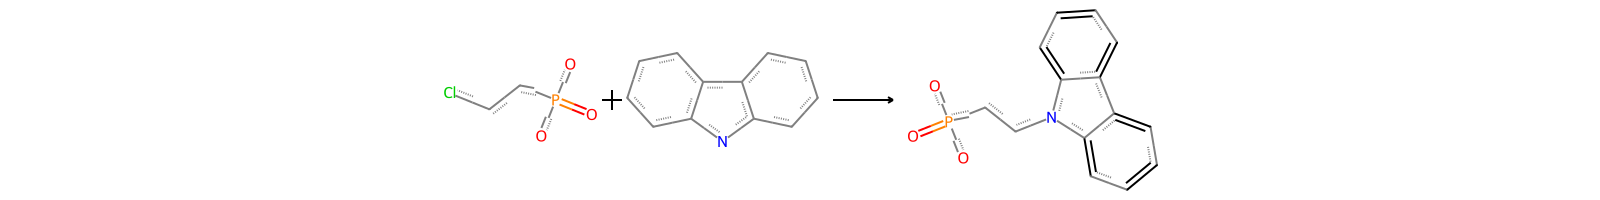

  Successfully generated and displayed image.
Successfully displayed 1 of 1 generated reaction images.{
  "action": "Final Answer",
  "action_input": "The reaction visualization has been successfully displayed. If you need further analysis or information about this reaction, please let me know."
}

> Finished chain.
The reaction visualization has been successfully displayed. If you need further analysis or information about this reaction, please let me know.{
  "action": "Final Answer",
  "action_input": "Here is the synthesis route for 2PACz (2-(9H-carbazol-9-yl)ethyl)phosphonic acid:\n\nReaction Route:\n\nO=P(O)(O)CCCl (2-chloroethylphosphonic acid) + carbazole (c1ccc2c(c1)[nH]c1ccccc12) → 2PACz (C1=CC=C2C(=C1)C3=CC=CC=C3N2CCP(=O)(O)O)\n\nThe graphical reaction route has been generated. If you need a detailed step-by-step synthesis procedure or want to download the reaction scheme, please let me know!"
}

> Finished chain.
Here is the synthesis route for 2PACz (2-(9H-carbazol-9-yl)et

In [11]:
response6=agent.invoke("can you give me a synthesis route of 2PACz, and show me the reaction route by graph")
print(response6)

In [ ]:
response7=agent.invoke("give me the dipole moment of molecule 'O=P(O)(O)CCN1c2ccc(Br)cc2Oc2cc(Br)ccc21' and molecule 'COC1=CC2=C(C=C1)N(CCP(O)(O)=O)C1=C2C=C(OC)C=C1'.")
print(response7)